<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Ajuste de curvas </font> </center>




<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Regression_pic_assymetrique.gif" width="400px" height="125px" />

> El **ajuste de curvas** es el proceso de construir una curva (función), que sea el mejor ajuste a una serie de puntos. Las curvas ajustadas pueden ser usadas como asistencia en la visualización de datos, para inferir valores de una función donde no hay datos disponibles, y para resumir la relación entre variables.

**Referencia**:
- https://en.wikipedia.org/wiki/Curve_fitting


## 0. Introducción

Consideremos un polinomio de grado uno:

$$y = \beta_1 x + \beta_0.$$

Esta es una **línea recta** que tiene pendiente $\beta_1$. Sabemos que habrá una línea conectando dos puntos cualesquiera. Por tanto, *una ecuación polinómica de primer grado es un ajuste perfecto entre dos puntos*.

Si consideramos ahora un polinomio de segundo grado,

$$y = \beta_2 x^2 + \beta_1 x + \beta_0,$$

este se ajustará exactamente a tres puntos. Si aumentamos el grado de la función a la de un polinomio de tercer grado, obtenemos:

$$y = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0,$$

que se ajustará a cuatro puntos.

**Ejemplos**
1. Encontrar la línea recta que pasa exactamente por los puntos $(0,1)$ y $(1,0)$.
2. Encontrar la parábola que pasa exactamente por los puntos $(-1,1)$, $(0,0)$ y $(1,1)$.

**Solución**
1. Consideramos $y=\beta_1 x + \beta_0$. Evaluando en el punto $(0,1)$, obtenemos $\beta_1(0) + \beta_0 = 1$. Ahora, evaluando en el punto $(1,0)$, obtenemos $\beta_1(1) + \beta_0 = 0$. De esta manera,
$$\left[\begin{array}{cc} 1 & 0 \\ 1 & 1\end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1\end{array}\right]=\left[\begin{array}{c} 1 \\ 0\end{array}\right].$$
Resolviendo, $\beta_0=-\beta_1=1$.

In [1]:
# Importar numpy y el matplotlib.pyplot
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Encontrar beta_0 y beta_1 resolviendo el sistema
help(np.linalg.solve)

Help on function solve in module numpy.linalg:

solve(a, b)
    Solve a linear matrix equation, or system of linear scalar equations.
    
    Computes the "exact" solution, `x`, of the well-determined, i.e., full
    rank, linear matrix equation `ax = b`.
    
    Parameters
    ----------
    a : (..., M, M) array_like
        Coefficient matrix.
    b : {(..., M,), (..., M, K)}, array_like
        Ordinate or "dependent variable" values.
    
    Returns
    -------
    x : {(..., M,), (..., M, K)} ndarray
        Solution to the system a x = b.  Returned shape is identical to `b`.
    
    Raises
    ------
    LinAlgError
        If `a` is singular or not square.
    
    See Also
    --------
    scipy.linalg.solve : Similar function in SciPy.
    
    Notes
    -----
    
    .. versionadded:: 1.8.0
    
    Broadcasting rules apply, see the `numpy.linalg` documentation for
    details.
    
    The solutions are computed using LAPACK routine ``_gesv``.
    
    `a` must be squa

In [3]:
A = np.array([[1,0],
              [1,1]])
b = np.array([1,0])

beta = np.linalg.solve(A,b)
beta

array([ 1., -1.])

In [4]:
# beta = A^-1 * b
# A*beta = b
#A^(-1)*A*beta = A^(-1)*b
# I*beta = A^(-1)*b
# beta = A^(-1)*b

beta = np.linalg.inv(A).dot(b)
beta

array([ 1., -1.])

$$ y=1 + -x $$

In [5]:
P1 = (0,1)
P2 = (1,0)

In [11]:
np.round(2.2355)

2.0

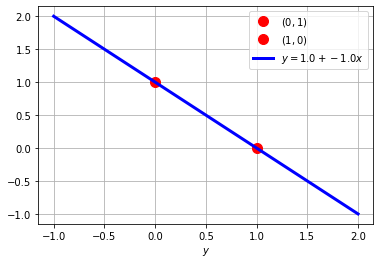

In [8]:
# Graficar la recta encontrada junto con los puntos
plt.figure(figsize=(6,4))
plt.plot(P1[0],P1[1],'ro',ms=10,label = f'${P1}$')
plt.plot(P2[0],P2[1],'ro',ms=10,label = f'${P2}$')
x_num = np.linspace(-1,2)
y_num = beta[0] + beta[1]*x_num

plt.plot(x_num, y_num, 'b', lw=3, label=f'$y ={np.round(beta[0],2)} + {np.round(beta[1],2)}x$')
plt.xlabel('$x$')
plt.xlabel('$y$')
plt.legend(loc='best')
plt.grid()
plt.show()

2. Consideramos $y=\beta_2 x^2 + \beta_1 x + \beta_0$. Evaluando en el punto $(-1,1)$, obtenemos $\beta_2(-1)^2 + \beta_1(-1) + \beta_0 = 1$. Ahora, evaluando en el punto $(0,0)$, obtenemos $\beta_2(0)^2 + \beta_1(0) + \beta_0 = 0$. Finalmente, evaluando en el punto $(1,1)$, obtenemos $\beta_2(1)^2 + \beta_1(1) + \beta_0 = 1$. De esta manera,
$$\left[\begin{array}{ccc} 1 & -1 & 1 \\ 1 & 0 & 0 \\ 1 & 1 & 1 \end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array}\right]=\left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right].$$
Resolviendo, $\beta_0=\beta_1=0$ y $\beta_2=1$.

In [12]:
# Encontrar beta_0, beta_1 y beta_2
A = np.array([[1,-1,1],
              [1,0,0],
              [1,1,1]])
b = np.array([1,0,1])

# solucion utilizando la inversa de la mat A
beta = np.linalg.inv(A).dot(b)
beta

array([0., 0., 1.])

In [ ]:
help(np.linalg.solve)

In [13]:
#Método de solucion de ecuaciones (como entrada se necesitan matrices y vectores)
beta = np.linalg.solve(A,b)
beta

array([0., 0., 1.])

In [14]:
#Definiendo los puntos
P1 = (-1,1)
P2 = (0,0)
P3 = (1,1)

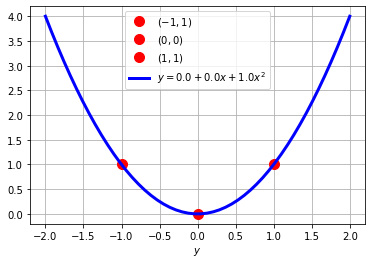

In [16]:
# Graficar la parabola junto con los puntos
plt.figure(figsize=(6,4))
plt.plot(P1[0],P1[1],'ro',ms=10,label = f'${P1}$')
plt.plot(P2[0],P2[1],'ro',ms=10,label = f'${P2}$')
plt.plot(P3[0],P3[1],'ro',ms=10,label = f'${P3}$')
x_num = np.linspace(-2,2)
# y = b2x^2 + b1x + b0
y_num = beta[0] + beta[1]*x_num + beta[2]*x_num**2


plt.plot(x_num, y_num, 'b', lw=3, label=f'$y ={np.round(beta[0],2)} + {np.round(beta[1],2)}x + {np.round(beta[2],2)}x^2$')
plt.xlabel('$x$')
plt.xlabel('$y$')
plt.legend(loc='best')
plt.grid()
plt.show()

### ¿Qué tienen en común los anteriores problemas?
Las curvas están completamente determinadas por los puntos (datos limpios, suficientes y necesarios).

Esto se traduce en que, al llevar el problema a un sistema de ecuaciones lineales, existe una única solución: **no hay necesidad, ni se puede optimizar nada**.

¿Tendremos datos así de '*bonitos*' en la vida real?

La realidad es que los datos que encontraremos en nuestra vida profesional se parecen más a esto...

In [17]:
# Crear un conjunto de puntos ruidosos a partir de una recta
N =100
x = np.linspace(0,10,N)
y = 10 + 2*x + np.random.normal(loc=0,scale=2,size=(N,))

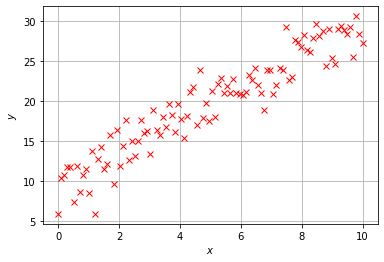

In [18]:
# Graficar
plt.figure(figsize=(6,4))
plt.plot(x,y,'xr',label='datos')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()

### ¿Cómo ajustamos una curva a esto?

## 1. Problema básico

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="400px" height="125px" />

Consideramos que tenemos un conjunto de n pares ordenados de datos $(x_i,y_i)$, para $i=1,2,3,\dots,n$.

### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$, de forma que la función evaluada en los puntos $x_i$ ($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\frac{1}{2n}\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\frac{1}{2n}\sum_{i=1}^{n}(y_i-(\beta_0+ \beta_1x_i))^2=\frac{1}{2n}\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\frac{1}{2n}\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1\quad\dots\quad y_n\right]^T$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2$$

Notar que el problema anterior no es de programación lineal, ¿porqué?

Para llevar a cabo la anterior minimización, la librería `SciPy` en su módulo `optimize` contiene la función `minimize`.

In [19]:
# Importar el módulo optimize de la librería scipy
from scipy import optimize as opt

In [20]:
help(opt.minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is an 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see her

Parámetros importantes:
- fun: función $f(x)$, se debe definir antes de llamar minimize, como `def f(x): ... return ...`
- x0: valor inicial. En una función no lineal, en general, hay múltiples mínimos. Dependiendo de la semilla caerá en uno de esos mínimos. Se ingresa como $x0 = \text{np.array}([x_{01},\dots,x_{0n}])$.
- bounds: como en linprog.
- constraints: funciones que definen las restricciones $g_i(x)$ y $h_j(x)$. Se definen igual que $f(x)$ y se ingresan como {'ineq': g_i, 'eq': h_j}.

Primero debemos construir la función objetivo y la semilla inicial:

In [21]:
# Definir funcion objetivo y punto inicial
def min_sqe(beta, x_points, y_points):
    n = len(x_points)
    #modelo matemático de la linea recta f_hat = b0 + b1x
    f_hat = beta[0] + beta[1]*x_points
    #Error cuadrático medio
    sqe = (1/(2*n))*((y_points - f_hat)**2).sum()
    
    return sqe

In [22]:
beta_ini = [0,0]

In [23]:
solucion = opt.minimize(fun =min_sqe, x0=beta_ini, args=(x,y))
solucion

      fun: 2.076118701738039
 hess_inv: array([[ 3.93320266, -0.58697806],
       [-0.58697806,  0.1174477 ]])
      jac: array([5.96046448e-08, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([9.60426814, 2.01505785])

In [24]:
solucion.x

array([9.60426814, 2.01505785])

In [25]:
beta =solucion.x
beta

array([9.60426814, 2.01505785])

$$\hat{f(x)}=9.857 + 2.01*x$$


¿Qué tan bien luce el ajuste?

In [26]:
# Coeficientes \beta_0 y \beta_1
beta[0], beta[1]

(9.604268137346947, 2.015057854355324)

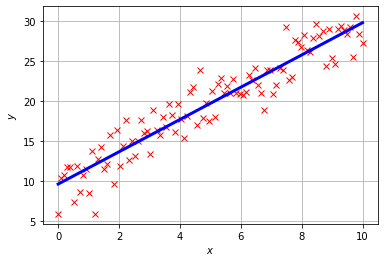

In [28]:
# Grafica de los puntos y la recta ajustada
plt.figure(figsize=(6,4))
plt.plot(x,y,'xr',label='datos')

f_hat = beta[0] + beta[1]*x

plt.plot(x,f_hat, 'b', lw=3)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()

Note que la pendiente es aproximadamente $2$ y el intercepto es aproximadamente $10$.

La anterior idea se puede extender a ajuste polinomial...

## 2. Ajuste polinomial

Ahora, considere el siguiente conjunto de datos...

In [29]:
# Generamos 100 puntos ruidosos a partir de una senoidal
N=100
x = np.linspace(0,1,N)
y = np.sin(2*np.pi*x) + np.random.normal(loc=0,scale=0.3, size=(N,))

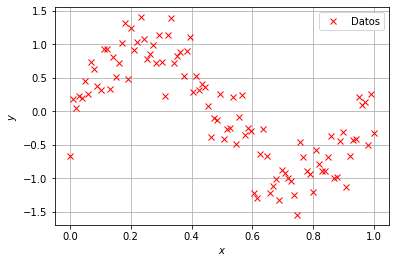

In [32]:
# Graficar
plt.figure(figsize=(6,4))
plt.plot(x,y,'xr',label='Datos')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### 2.1. ¿Se ajustará bien una recta?

In [33]:
# Definir funcion objetivo y semilla
def min_sqe_1(beta, x_points,y_points):
    n = len(x_points)
    #Modelo lineal f_hat = b0 + b1x
    f_hat = beta[0] + beta[1]*x_points
    sqe = (1/(2*n))*((y_points - f_hat)**2).sum()
    
    return sqe
    

In [34]:
# Resolver
beta_ini_1 = [0,0]

In [35]:
sol_1 = opt.minimize(fun=min_sqe_1, x0=beta_ini_1, args = (x,y))
sol_1

      fun: 0.15319092791694114
 hess_inv: array([[ 3.88258626, -5.84233222],
       [-5.84233222, 11.7363644 ]])
      jac: array([1.78813934e-06, 7.41332769e-07])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([ 0.88566177, -1.79508687])

**Veamos $\beta$ para el ajuste con recta**

In [36]:
beta_1 = sol_1.x
beta_1

array([ 0.88566177, -1.79508687])

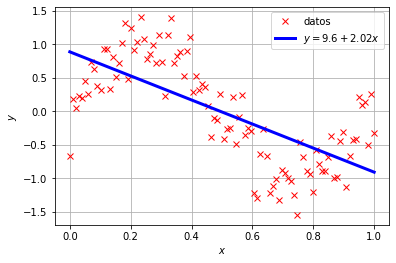

In [39]:
# Grafica de los puntos y la recta ajustada
# Grafica de los puntos y la recta ajustada
plt.figure(figsize=(6,4))
plt.plot(x,y,'xr',label='datos')

f_hat = beta_1[0] + beta_1[1]*x

plt.plot(x,f_hat, 'b', lw=3, label = f'$y= {np.round(beta[0],2)} + {np.round(beta[1],2)}x$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### 2.2. La recta no es buen ajuste... ¿Se ajustará bien una parabola?

In [40]:
# Definir funcion objetivo y semilla
# f_hat = b0 + b1x +b2x^2

def min_sqe_2(beta,x_points,y_points):
    n=len(x_points)
    # f_hat = b0 + b1x +b2x^2   ----> modelo de una parábola (polinomio de grado 2)
    f_hat = beta[0] + beta[1]*x_points + beta[2]*x_points**2
    
    sqe = (1/(2*n))*((y_points - f_hat)**2).sum()
    
    return sqe

In [41]:
# Resolver
beta_ini_2 = [0,0,0]
sol_2 = opt.minimize(fun=min_sqe_2, x0=beta_ini_2, args=(x,y))
sol_2

      fun: 0.15314510245133645
 hess_inv: array([[   8.47826868,  -34.25446848,   28.66486634],
       [ -34.25446848,  184.37903073, -173.08586281],
       [  28.66486634, -173.08586281,  172.91311433]])
      jac: array([-1.23120844e-06, -9.16421413e-07, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 72
      nit: 16
     njev: 18
   status: 0
  success: True
        x: array([ 0.90643372, -1.92100501,  0.12591637])

In [42]:
sol_2.x

array([ 0.90643372, -1.92100501,  0.12591637])

**Veamos $\beta$ para el ajuste con parábola**

In [44]:
# Mostrar coeficientes
beta_2 = sol_2.x
beta_2

array([ 0.90643372, -1.92100501,  0.12591637])

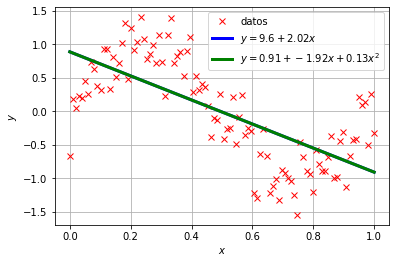

In [48]:
# Graficar recta y parabola ajustadas
plt.figure(figsize=(6,4))
plt.plot(x,y,'xr',label='datos')

## modelo lineal
f_hat = beta_1[0] + beta_1[1]*x
plt.plot(x,f_hat, 'b', lw=3, label = f'$y= {np.round(beta[0],2)} + {np.round(beta[1],2)}x$')
## f_hat = b0 + b1x +b2x^2  (modelo polinomial grado 2)
f_hat_2 = beta_2[0] + beta_2[1]*x + beta_2[2]*x**2
plt.plot(x,f_hat, 'g', lw=3, label = f'$y= {np.round(beta_2[0],2)} + {np.round(beta_2[1],2)}x +  {np.round(beta_2[2],2)}x^2$')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### 2.3. Tampoco. Quizá un polinomio cúbico...

In [49]:
# Definir funcion objetivo y semilla
def min_sqe_3(beta,x_points,y_points):
    n = len(x_points)
    f_hat = beta[0] + beta[1]*x_points + beta[2]*x_points**2 + beta[3]*x_points**3
    
    sqe = (1/(2*n))*((y_points - f_hat)**2).sum()
    return sqe

In [50]:
beta_ini_3 = [0,0,0,0]

In [51]:
sol_3 = opt.minimize(fun=min_sqe_3, x0=beta_ini_3, args=(x,y))
sol_3

      fun: 0.04618118775378682
 hess_inv: array([[   14.36666908,  -108.18591283,   216.66469951,  -126.36452466],
       [ -108.18591283,  1108.63334238, -2512.7410748 ,  1567.12568136],
       [  216.66469951, -2512.7410748 ,  6074.50896655, -3943.96167565],
       [ -126.36452466,  1567.12568136, -3943.96167565,  2632.01731938]])
      jac: array([9.64384526e-07, 3.93483788e-07, 3.90689820e-07, 3.92086804e-07])
  message: 'Optimization terminated successfully.'
     nfev: 165
      nit: 32
     njev: 33
   status: 0
  success: True
        x: array([ -0.24600311,  12.2659164 , -35.52024216,  23.76412449])

**Veamos $\beta$ para el ajuste con cúbica**

In [54]:
# Mostrar coeficientes
beta_3 = sol_3.x
beta_3

array([ -0.24600311,  12.2659164 , -35.52024216,  23.76412449])

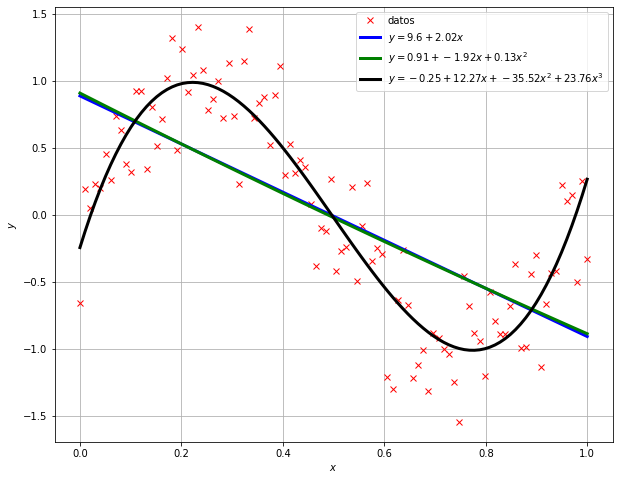

In [61]:
# Graficar recta y parabola ajustadas
plt.figure(figsize=(10,8))
plt.plot(x,y,'xr',label='datos')

## modelo lineal f_hat = b0+b1x
f_hat = beta_1[0] + beta_1[1]*x
plt.plot(x,f_hat, 'b', lw=3, label = f'$y= {np.round(beta[0],2)} + {np.round(beta[1],2)}x$')

## f_hat = b0 + b1x +b2x^2  (modelo polinomial grado 2)
f_hat_2 = beta_2[0] + beta_2[1]*x + beta_2[2]*x**2
plt.plot(x,f_hat_2, 'g', lw=3, label = f'$y= {np.round(beta_2[0],2)} + {np.round(beta_2[1],2)}x +  {np.round(beta_2[2],2)}x^2$')

## f_hat = b0 + b1x + b2x^2 + beta3x^3  (modelo polinomial grado 3)
f_hat_3 = beta_3[0] + beta_3[1]*x + beta_3[2]*x**2 + beta_3[3]*x**3
plt.plot(x,f_hat_3, 'k', lw=3, 
         label = f'$y= {np.round(beta_3[0],2)} + {np.round(beta_3[1],2)}x +  {np.round(beta_3[2],2)}x^2 +  {np.round(beta_3[3],2)}x^3$')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

Mucho mejor. Entonces, ¿mientras más se suba el orden mejor la aproximación?

### 2.4. Ajustemos un polinomio de grado 7...

In [62]:
# Definimos funcion objetivo y semilla
#Función objetivo para polinomio de grado N
def min_sq_N(beta, x_points, y_points, N):
    n = len(x_points)
    f_hat = np.array([beta[i]*x_points**i for i in range(N+1)]).sum(axis=0)
    
    sqe = (1/(2*n))*((y_points - f_hat)**2).sum()
    return sqe
    
    

In [63]:
# Resolvemos
sol_7 = opt.minimize(fun=min_sq_N, x0=np.zeros(8), args=(x,y,7))
sol_7

      fun: 0.043913798665690534
 hess_inv: array([[   14.71744087,  -117.00840431,   210.01183177,    12.76680042,
         -117.89456238,  -114.67371377,   -16.82509821,   132.41978891],
       [ -117.00840431,  1310.01168811, -2758.65625835,   -16.57425074,
         1704.54662794,  1577.99082245,   167.65946217, -1929.95213896],
       [  210.01183177, -2758.65625835,  6407.89469522,  -227.85165699,
        -4240.81851694, -3791.47455522,  -276.545141  ,  4862.93372221],
       [   12.76680042,   -16.57425074,  -227.85165699,   144.32302654,
          294.60106697,   196.27125121,   -56.86819353,  -383.79436759],
       [ -117.89456238,  1704.54662794, -4240.81851694,   294.60106697,
         2961.00044848,  2575.01475236,   112.1403291 , -3443.10287212],
       [ -114.67371377,  1577.99082245, -3791.47455522,   196.27125121,
         2575.01475236,  2273.15712033,   134.63367123, -2971.40512718],
       [  -16.82509821,   167.65946217,  -276.545141  ,   -56.86819353,
          112.1

**De nuevo, veamos $\beta$**

In [64]:
# Mostrar coeficientes
beta_7 = sol_7.x
beta_7

array([ -0.21652516,  10.71472736, -23.52901986,  -2.91377809,
        11.43431714,  12.22690813,   3.29610925, -11.00663015])

**¡Cuidado! OVERFITTING...**

Observar el tamaño de algunos coeficientes. Cuando los coeficientes son grandes, ¿qué pasa?

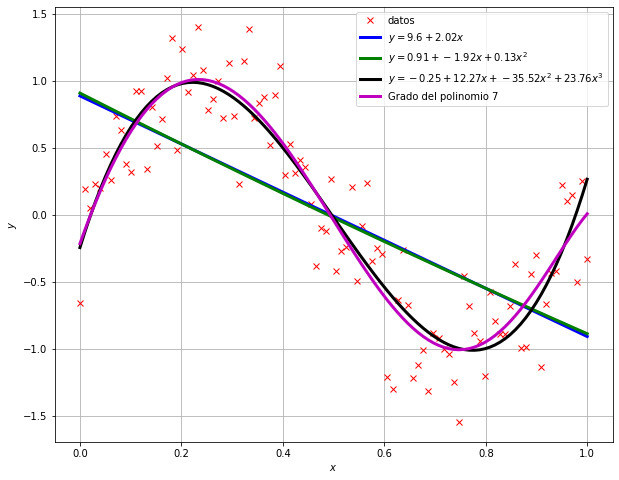

In [65]:
# Graficar recta y parabola ajustadas
plt.figure(figsize=(10,8))
plt.plot(x,y,'xr',label='datos')

## modelo lineal f_hat = b0+b1x
f_hat = beta_1[0] + beta_1[1]*x
plt.plot(x,f_hat, 'b', lw=3, label = f'$y= {np.round(beta[0],2)} + {np.round(beta[1],2)}x$')

## f_hat = b0 + b1x +b2x^2  (modelo polinomial grado 2)
f_hat_2 = beta_2[0] + beta_2[1]*x + beta_2[2]*x**2
plt.plot(x,f_hat_2, 'g', lw=3, label = f'$y= {np.round(beta_2[0],2)} + {np.round(beta_2[1],2)}x +  {np.round(beta_2[2],2)}x^2$')

## f_hat = b0 + b1x + b2x^2 + beta3x^3  (modelo polinomial grado 3)
f_hat_3 = beta_3[0] + beta_3[1]*x + beta_3[2]*x**2 + beta_3[3]*x**3
plt.plot(x,f_hat_3, 'k', lw=3, 
         label = f'$y= {np.round(beta_3[0],2)} + {np.round(beta_3[1],2)}x +  {np.round(beta_3[2],2)}x^2 +  {np.round(beta_3[3],2)}x^3$')

## f_hat = b0 + b1x + b2x^2 + beta3x^3  (modelo polinomial grado 7)
f_hat_7 = np.array([beta_7[i]*x**i for i in range(8)]).sum(axis=0)

plt.plot(x,f_hat_7, 'm', lw=3, 
         label = f'Grado del polinomio 7')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

Es conveniente ver el error como función del orden del polinomio... **selección de modelos**

In [68]:
# Error cuadratico
error = []
for i in range(1,10):
    beta_ini = np.zeros(i+1)
    sol = opt.minimize(fun=min_sq_N, x0=beta_ini, args = (x,y,i))
    error.append(sol.fun)

In [69]:
error

[0.15319092791694114,
 0.15314510245133645,
 0.04618118775378682,
 0.04587450667364342,
 0.04406196957732915,
 0.04387529293274305,
 0.043913798665690534,
 0.043814739142244985,
 0.043800867682654385]

Text(0, 0.5, 'Error cuadrático medio')

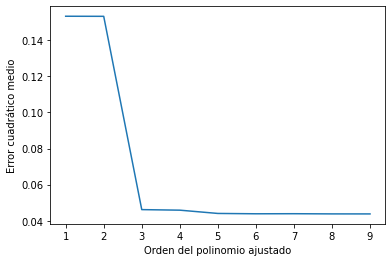

In [71]:
#Plotear la lista de los errores de los ajustes de curvas
plt.figure(figsize=(6,4))
plt.plot(range(1,10),error)
plt.xlabel('Orden del polinomio ajustado')
plt.ylabel('Error cuadrático medio')

En efecto, parece que con $3$ es suficiente.

### ¿Cómo prevenir el *overfitting* sin importar el orden del modelo?

## 3. Regularización

Vimos que la solución de mínimos cuadrados es:
$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2.$$

Sin embargo, si crecemos el orden del modelo hay overfitting y algunos coeficientes óptimos $\boldsymbol{\beta}$ crecen muchísimo. Que un coeficiente sea muy grande, significa que se le da mucha importancia a alguna característica (que quizá sea ruido... no sirve para predecir).

La regularización consiste en penalizar la magnitud de los coeficientes $\boldsymbol{\beta}$ en el problema de optimización, para que no crezcan tanto. 

### 3.1. Ridge

$$\boldsymbol{\beta}^{ridge} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|^2$$

In [74]:
#Función objetivo para polinomio de grado N
def min_sq_N_ridge(beta, x_points, y_points, N, l):
    n = len(x_points)
    f_hat = np.array([beta[i]*x_points**i for i in range(N+1)]).sum(axis=0)
    
    sqe = (1/(2*n))*((y_points - f_hat)**2).sum() + l*np.linalg.norm(beta)**2
    return sqe

In [75]:
beta_ridge_ini = np.zeros(8)
beta_ridge_ini

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [85]:
sol_7_ridge = opt.minimize(fun=min_sq_N_ridge, x0=beta_ridge_ini, args=(x,y,7,0.0003))
sol_7_ridge

      fun: 0.08512697682614827
 hess_inv: array([[ 7.84822529e+00, -3.34564923e+01,  2.52861757e+01,
         1.51833708e+01, -2.56201594e-02, -7.28957795e+00,
        -6.96348898e+00, -1.61877695e+00],
       [-3.34564923e+01,  2.38076161e+02, -2.96453906e+02,
        -9.48982560e+01,  8.45285379e+01,  1.25528229e+02,
         5.81911108e+01, -7.29634360e+01],
       [ 2.52861757e+01, -2.96453906e+02,  5.99791913e+02,
         3.24843025e+01, -3.39083080e+02, -3.30795424e+02,
        -5.49967453e+01,  3.65862625e+02],
       [ 1.51833708e+01, -9.48982560e+01,  3.24843025e+01,
         9.54680888e+01,  8.02115271e+01,  2.42729044e+01,
        -4.85260260e+01, -1.24431000e+02],
       [-2.56201594e-02,  8.45285379e+01, -3.39083080e+02,
         8.02115271e+01,  2.97950338e+02,  2.32286821e+02,
        -1.72772162e+01, -3.60688996e+02],
       [-7.28957795e+00,  1.25528229e+02, -3.30795424e+02,
         2.42729044e+01,  2.32286821e+02,  2.03486743e+02,
         1.08970712e+01, -2.6569643

In [86]:
beta_ridge_7 = sol_7_ridge.x
beta_ridge_7

array([ 0.52863654,  1.8832722 , -4.64728526, -2.75225774, -0.17868929,
        1.42920143,  2.06578718,  2.01945736])

In [87]:
beta_7

array([ -0.21652516,  10.71472736, -23.52901986,  -2.91377809,
        11.43431714,  12.22690813,   3.29610925, -11.00663015])

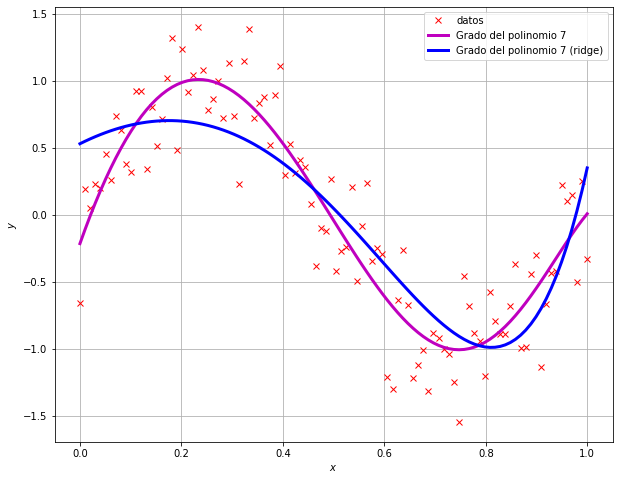

In [88]:
# Graficar recta y parabola ajustadas
plt.figure(figsize=(10,8))
plt.plot(x,y,'xr',label='datos')

## f_hat = b0 + b1x + b2x^2 + beta3x^3  (modelo polinomial grado 7)
f_hat_7 = np.array([beta_7[i]*x**i for i in range(8)]).sum(axis=0)

## f_hat = b0 + b1x + b2x^2 + beta3x^3  (modelo polinomial grado 7)
f_hat_7_ridge = np.array([beta_ridge_7[i]*x**i for i in range(8)]).sum(axis=0)

plt.plot(x,f_hat_7, 'm', lw=3, 
         label = f'Grado del polinomio 7')

plt.plot(x,f_hat_7_ridge, 'b', lw=3, 
         label = f'Grado del polinomio 7 (ridge)')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### 3.2. Lasso

$$\boldsymbol{\beta}^{lasso} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|_1$$

La norma 1 no es más que la suma de los valores absolutos de las componentes $\left|\left|\boldsymbol{\beta}\right|\right|_1=\sum_{j=0}^m\left|\beta_j\right|$.

In [89]:
#Función objetivo para polinomio de grado N
def min_sq_N_lasso(beta, x_points, y_points, N, l):
    n = len(x_points)
    f_hat = np.array([beta[i]*x_points**i for i in range(N+1)]).sum(axis=0)
    
    sqe = (1/(2*n))*((y_points - f_hat)**2).sum() + l*np.abs(beta).sum()
    return sqe

In [90]:
beta_lasso_ini = np.zeros(8)
beta_lasso_ini

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [95]:
sol_lasso_7 = opt.minimize(fun=min_sq_N_lasso, x0=beta_lasso_ini, args=(x,y,7,0.003))
sol_lasso_7

      fun: 0.11303370861739344
 hess_inv: array([[ 6.22241493e+00, -2.69321407e+01,  2.11574063e+01,
         9.52287701e+00,  7.23746684e-02,  1.94446662e+00,
        -1.24311315e+00, -1.35850184e+01],
       [-2.69321407e+01,  1.80055794e+02, -1.73975273e+02,
        -7.83923295e+01, -5.61814874e-01, -1.25441665e+01,
         2.02865368e+01,  1.14721356e+02],
       [ 2.11574063e+01, -1.73975273e+02,  1.90621371e+02,
         8.34919868e+01,  6.26236973e-01,  1.15467850e+01,
        -3.09293693e+01, -1.30885261e+02],
       [ 9.52287701e+00, -7.83923295e+01,  8.34919868e+01,
         3.95451146e+01,  2.36901667e-01,  5.90411350e+00,
        -1.41066392e+01, -5.75305705e+01],
       [ 7.23746684e-02, -5.61814874e-01,  6.26236973e-01,
         2.36901667e-01,  5.30948883e-02,  7.11106039e-02,
        -1.48610740e-01, -4.87658552e-01],
       [ 1.94446662e+00, -1.25441665e+01,  1.15467850e+01,
         5.90411350e+00,  7.11106039e-02,  3.30113813e+00,
        -2.93148605e+00, -8.8156862

In [96]:
beta_lasso_7 = sol_lasso_7.x
beta_lasso_7

array([ 6.85468801e-01,  6.21879880e-01, -3.37938422e+00, -1.57163471e+00,
        2.00128237e-05, -2.86120399e-10,  1.26444256e+00,  2.58106942e+00])

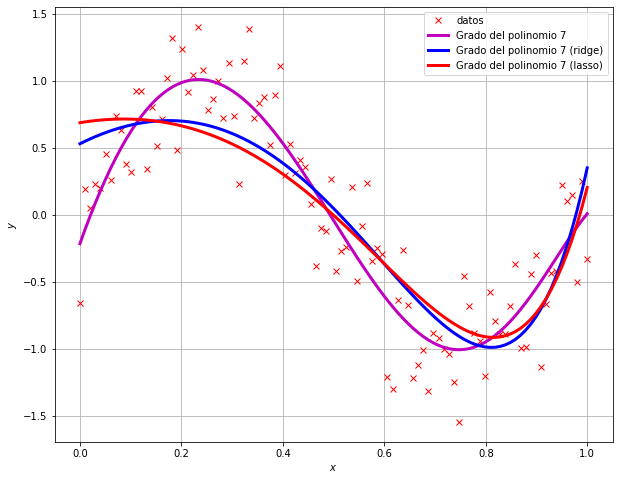

In [97]:
# Graficar recta y parabola ajustadas
plt.figure(figsize=(10,8))
plt.plot(x,y,'xr',label='datos')

## f_hat = b0 + b1x + b2x^2 + beta3x^3  (modelo polinomial grado 7)
f_hat_7 = np.array([beta_7[i]*x**i for i in range(8)]).sum(axis=0)

## f_hat = b0 + b1x + b2x^2 + beta3x^3  (modelo polinomial grado 7)
f_hat_7_ridge = np.array([beta_ridge_7[i]*x**i for i in range(8)]).sum(axis=0)

## f_hat = b0 + b1x + b2x^2 + beta3x^3  (modelo polinomial grado 7)
f_hat_7_lasso = np.array([beta_lasso_7[i]*x**i for i in range(8)]).sum(axis=0)

plt.plot(x,f_hat_7, 'm', lw=3, 
         label = f'Grado del polinomio 7')

plt.plot(x,f_hat_7_ridge, 'b', lw=3, 
         label = f'Grado del polinomio 7 (ridge)')

plt.plot(x,f_hat_7_lasso, 'r', lw=3, 
         label = f'Grado del polinomio 7 (lasso)')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()


## 4. Ajuste robusto

Ahora, consideremos de nuevo el caso de la línea recta con un par de puntos atípicos al inicio y al final...

Solucionamos el problema normalmente...

Si estos puntos que parecen ser atípicos, hacen parte de una 'mala medición', vemos que el ajuste que obtenemos a los otros puntos es muy pobre...

**¿Cómo podemos evitar esto?** La respuesta es [*ajuste robusto*](https://en.wikipedia.org/wiki/Huber_loss).

Mejor...

## 5. Actividad

La siguiente celda lee datos correspondientes a tamaños $x$ ($ft^2$) y precios $y$ (USD) de casas en Portland, Oregon.

1. Graficar estos datos poniendo los precios en el eje $y$ y los tamaños en el eje $x$.
2. Ajustar polinomios de grado 1 hasta grado 5.
3. Graficar el error cuadrático acumulado contra el número de términos, y elegir un polinomio que ajuste bien y su grado sea el menor posible.
4. Supongamos que un amigo tuyo tiene una casa de $1250 ft^2$. Según tu modelo, ¿en cuánto podría vender dicha casa?


In [ ]:
import pandas as pd
data = pd.read_csv('housing_prices.csv')


In [ ]:
data.head()

# Avisos:

## Proyecto:
### 1. Elegir integrantes para proyecto. Mínimo 2, máximo 3 (sin excepción). Algún integrante del equipo me deberá mandar un mensaje por MSTeams con los nombres de los integrantes.
### 2. Deben elegir un tema para proyecto que se pueda resolver como un problema de optimización (preferiblemente, relacionado con su carrera). 
### 3. Tendrán que mandarme un mensaje con su tema de proyecto. Juntos, definiremos el alcance.
### 4. Fecha de entrega y presentación: 

# 2 de Octubre Examen modulo 1,  9 de Octubre Presentación del Proyecto